In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# input
TRAIN_DATASET = 'train.csv'
TEST_DATASET = 'test.csv'
# output
SUBMISSION = 'Antanishyna_submission.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATASET)
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [4]:
TARGET_NAME = 'mean_exam_points'
BASE_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME, 'Id']).tolist()
X = df_train[BASE_FEATURE_NAMES].values
y = df_train[TARGET_NAME].values

In [5]:
BASE_FEATURE_NAMES

['age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history']

In [6]:
df_train.shape

(10000, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [8]:
df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [9]:
df_train.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [10]:
df_train[TARGET_NAME].value_counts()

63     312
59     279
61     273
57     266
62     264
      ... 
100     32
33      30
96      28
99      19
98      17
Name: mean_exam_points, Length: 69, dtype: int64

(array([ 405.,  694., 1227., 1729., 1626., 1542., 1161.,  865.,  529.,
         222.]),
 array([ 32. ,  38.8,  45.6,  52.4,  59.2,  66. ,  72.8,  79.6,  86.4,
         93.2, 100. ]),
 <BarContainer object of 10 artists>)

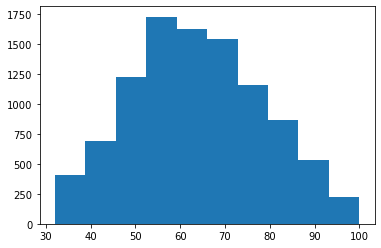

In [11]:
plt.hist(df_train[TARGET_NAME])

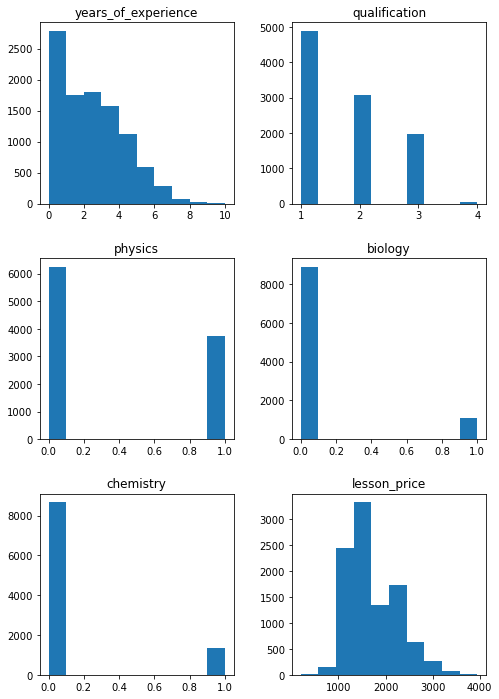

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
ax1.hist(df_train['years_of_experience'])
ax1.set_title('years_of_experience')
ax2.hist(df_train['qualification'])
ax2.set_title('qualification')
ax3.hist(df_train['physics'])
ax3.set_title('physics')
ax4.hist(df_train['biology'])
ax4.set_title('biology')
ax5.hist(df_train['chemistry'])
ax5.set_title('chemistry')
ax6.hist(df_train['lesson_price'])
ax6.set_title('lesson_price')
fig.set_size_inches(8, 12)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [13]:
def custom_minmax_scaler(x):
    xmin =  x.min(axis=0)
    res = (x - xmin) / (x.max(axis=0) - xmin)
    return res

In [14]:
df_norm = df_train.copy()

In [15]:
df_norm['years_of_experience'] = custom_minmax_scaler(df_norm['years_of_experience'])
df_norm['qualification'] = custom_minmax_scaler(df_norm['qualification'])
df_norm['physics'] = custom_minmax_scaler(df_norm['physics'])
df_norm['biology'] = custom_minmax_scaler(df_norm['biology'])
df_norm['chemistry'] = custom_minmax_scaler(df_norm['chemistry'])
df_norm['lesson_price'] = custom_minmax_scaler(df_norm['lesson_price'])
df_norm['english'] = custom_minmax_scaler(df_norm['english'])

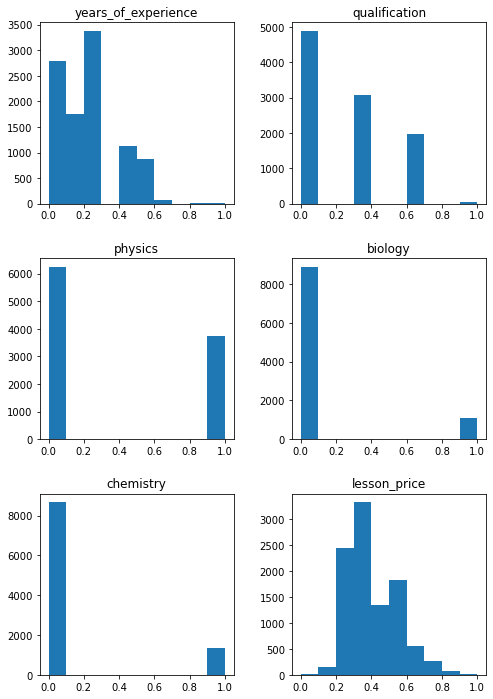

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
ax1.hist(df_norm['years_of_experience'])
ax1.set_title('years_of_experience')
ax2.hist(df_norm['qualification'])
ax2.set_title('qualification')
ax3.hist(df_norm['physics'])
ax3.set_title('physics')
ax4.hist(df_norm['biology'])
ax4.set_title('biology')
ax5.hist(df_norm['chemistry'])
ax5.set_title('chemistry')
ax6.hist(df_norm['lesson_price'])
ax6.set_title('lesson_price')
fig.set_size_inches(8, 12)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

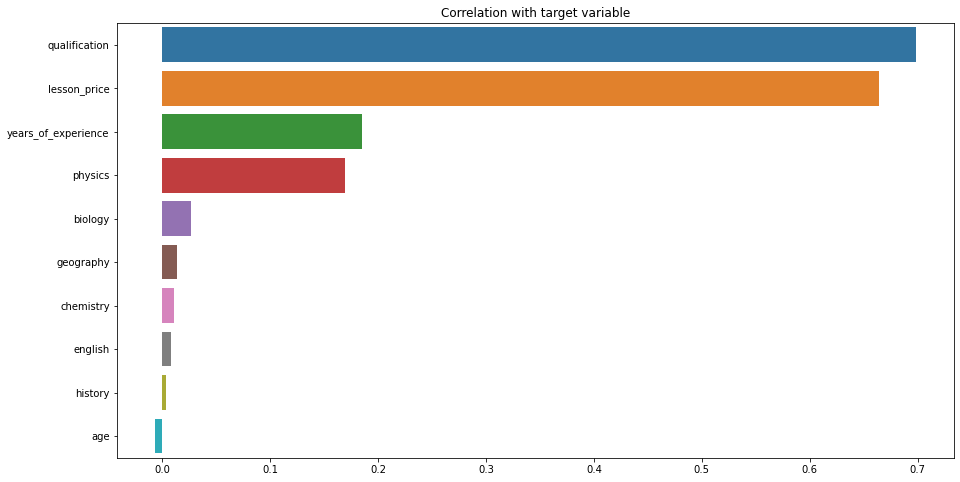

In [17]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

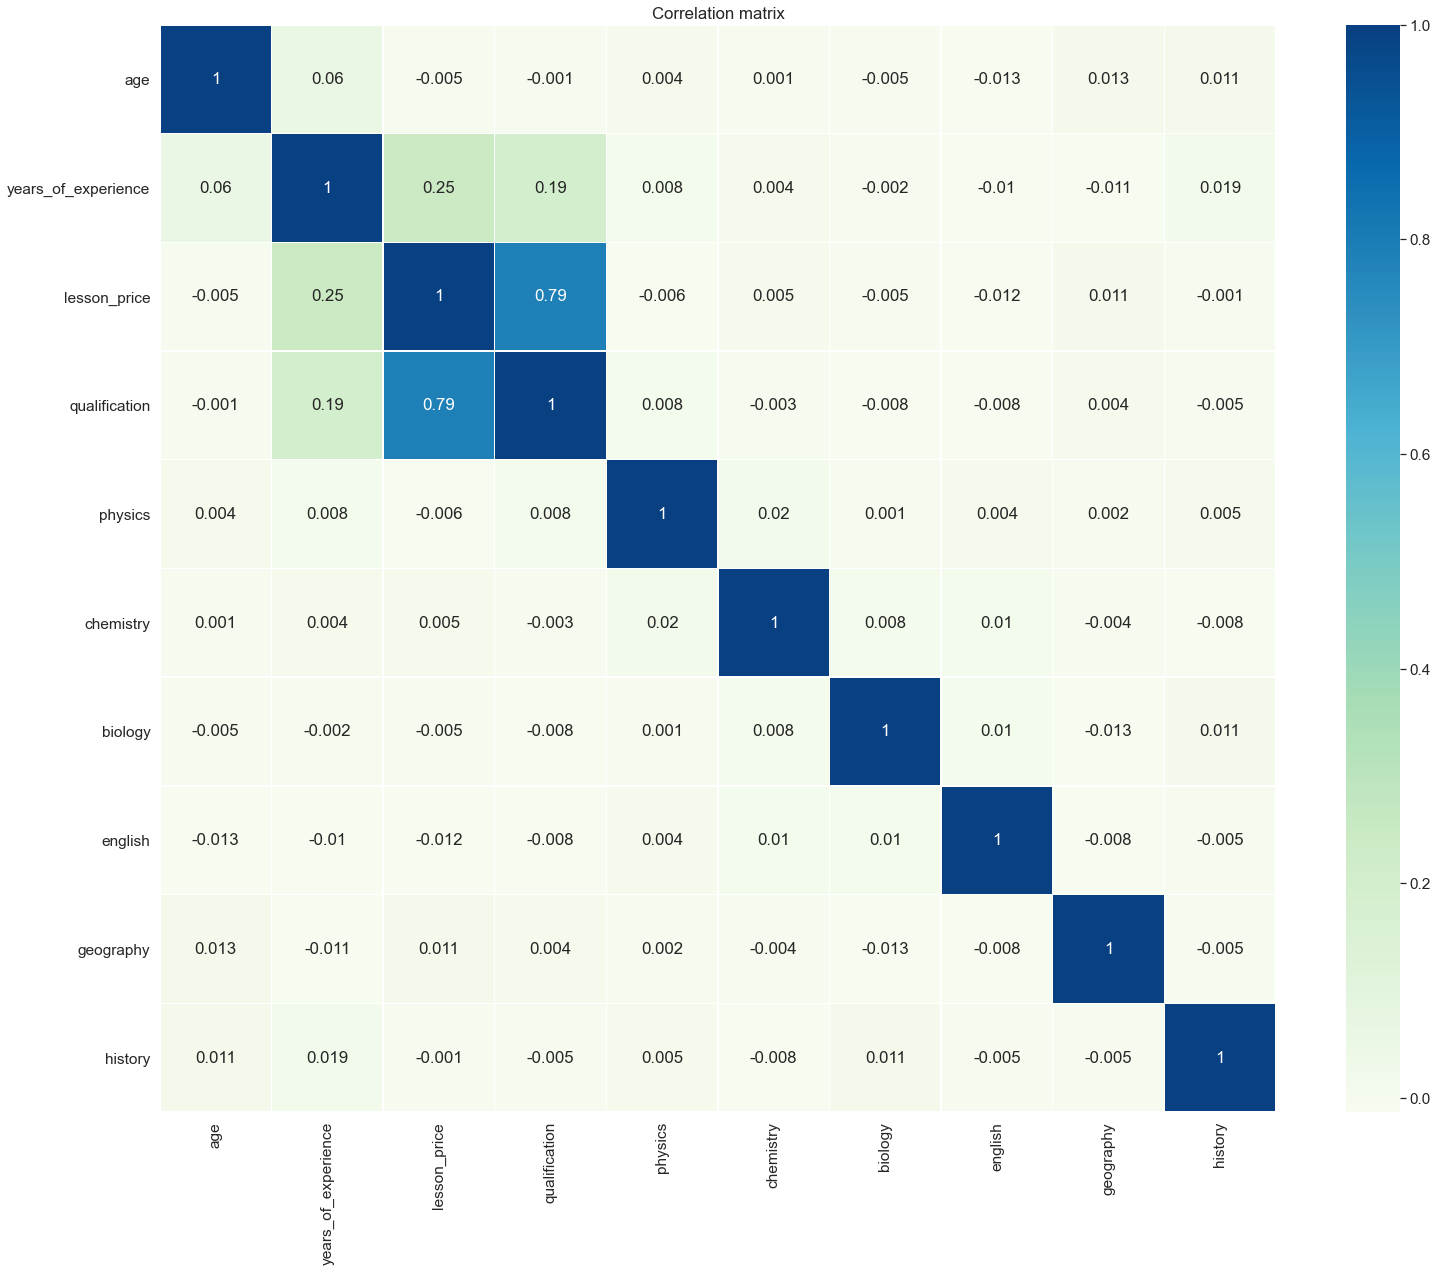

In [18]:
plt.figure(figsize = (25,20))
sns.set(font_scale=1.4)
sns.heatmap(df_train[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

In [19]:
FINAL_FEATURE_NAMES = BASE_FEATURE_NAMES[1:5]
FINAL_FEATURE_NAMES

['years_of_experience', 'lesson_price', 'qualification', 'physics']

In [20]:
X = df_train[FINAL_FEATURE_NAMES].values
y = df_train[TARGET_NAME].values

In [21]:
X_norm = df_norm[FINAL_FEATURE_NAMES].values

In [22]:
def custom_r2_score(y, y_pred):
     return 1 - ((sum((y_pred - y)**2)) / (sum((y - np.mean(y))**2)))

In [23]:
class Node:

    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

In [24]:
class Leaf_regr:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [25]:
class BaseTree:

    def __init__(self,
                 max_depth,
                 max_leaf_nodes,
                 min_leaf_samples,
                 leaf_class):
        self.max_depth = max_depth
        self.nodes = []
        self.leaves = []
        self.depth = 0
        self.max_leaves = max_leaf_nodes
        self.min_objects = min_leaf_samples
        self.tree = None
        self.Leaf = leaf_class
        
    # Разбиение датасета в узле
    def split(self,
              data,
              labels,
              column_index,
              t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels
    
    # Расчет прироста
    def gain(self,
             left_labels,
             right_labels,
             root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return root - p * self.criterion(left_labels) - (1 - p) * self.criterion(right_labels)   
    
    # Нахождение наилучшего разбиения
    def find_best_split(self,
                        data,
                        labels):

        #  обозначим минимальное количество объектов в узле
        min_samples_leaf = 5

        root = self.criterion(labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_labels, false_labels, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    # Построение дерева с помощью рекурсивной функции
    def build_tree(self,
                   data,
                   labels):

        gain, t, index = self.find_best_split(data, labels)
         
        #  Базовый случай 2 - прекращаем рекурсию, когда достигли максимальной глубины дерева
        if self.depth > self.max_depth:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 3 - прекращаем рекурсию, когда достигли максимального количества листьев
        if len(self.leaves) >= self.max_leaves - 1 or self.depth >= self.max_leaves - 1:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
        #  Базовый случай 4 - прекращаем рекурсию, когда достигли минимального количества объектов в листе
        if len(data) <= self.min_objects:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)
        
         #  Базовый случай 1 - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0:
            self.leaves.append(self.Leaf(data, labels))
            return self.Leaf(data, labels)

        self.depth += 1
        
        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels)
        false_branch = self.build_tree(false_data, false_labels)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        self.nodes.append(Node(index, t, true_branch, false_branch))
        return Node(index, t, true_branch, false_branch)
    
    def predict_object(self,
                       obj,
                       node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, self.Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels)
        return self
    
    def predict(self, data):
    
        classes = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            classes.append(prediction)
        return classes                     

In [26]:
class Regression_Tree(BaseTree):
    def __init__(self,
                 max_depth=np.inf,
                 max_leaf_nodes=np.inf,
                 min_leaf_samples=1,
                 leaf_class=Leaf_regr):
        super().__init__(max_depth=max_depth,
                         max_leaf_nodes=max_leaf_nodes,
                         min_leaf_samples=min_leaf_samples,
                         leaf_class=Leaf_regr)

    # Расчет дисперсии
    def criterion(self, targets):
        return np.mean((targets - targets.mean())**2)

In [27]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [56]:
def gb_predict(X, trees_list, eta):
    
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )
    return predictions

In [57]:
def residual(y, z):
    return - (z - y)

In [58]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, sample_coef=0.5):
    n_samples = X_train.shape[0] 
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = Regression_Tree(max_depth=max_depth)
        indices = np.random.randint(0, n_samples, int(n_samples * sample_coef))
        X_train_sampled, y_train_sampled = X_train[indices], y_train[indices]
        
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            
            # обучаем первое дерево на случайной половине обучающей выборке            
            tree.fit(X_train_sampled, y_train_sampled)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_sampled, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_sampled, residual(y_train_sampled, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors


In [73]:
n_trees = 50
max_depth = 3
eta = 0.3

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=2)

In [75]:
trees, train_errors, test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, sample_coef=0.5)

In [76]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [77]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 78.53958713971059
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 81.70322566476379


In [78]:
df_test = pd.read_csv(TEST_DATASET)

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [86]:
df_test_norm = df_test.copy()

In [89]:
df_test_norm['years_of_experience'] = custom_minmax_scaler(df_test_norm['years_of_experience'])
df_test_norm['qualification'] = custom_minmax_scaler(df_test_norm['qualification'])
df_test_norm['physics'] = custom_minmax_scaler(df_test_norm['physics'])
df_test_norm['biology'] = custom_minmax_scaler(df_test_norm['biology'])
df_test_norm['chemistry'] = custom_minmax_scaler(df_test_norm['chemistry'])
df_test_norm['lesson_price'] = custom_minmax_scaler(df_test_norm['lesson_price'])
df_test_norm['english'] = custom_minmax_scaler(df_test_norm['english'])

In [90]:
X_test = df_test_norm[FINAL_FEATURE_NAMES].values

In [91]:
prediction = gb_predict(X_test, trees, eta)

In [92]:
sub = pd.concat([df_test['Id'], pd.Series(prediction)], axis=1)

In [93]:
sub = sub.rename(columns={0: 'mean_exam_points'})

In [94]:
sub.to_csv('Antanishyna_prediction.csv',index=None)